<a href="https://colab.research.google.com/github/sayan54/Campus-Placement-prediction/blob/main/Campus_Placement_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **IMPORTING LIBRARIES**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('/content/drive/MyDrive/Engineering Placements Prediction dataset.csv')
df.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


In [5]:
df.shape

(2966, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                2966 non-null   int64 
 1   Gender             2966 non-null   object
 2   Stream             2966 non-null   object
 3   Internships        2966 non-null   int64 
 4   CGPA               2966 non-null   int64 
 5   Hostel             2966 non-null   int64 
 6   HistoryOfBacklogs  2966 non-null   int64 
 7   PlacedOrNot        2966 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 185.5+ KB


In [7]:
df.describe()

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
count,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000
mean,21.485840,0.703641,7.073837,0.269049,0.192178,0.552596
std,1.324933,0.740197,0.967748,0.443540,0.394079,0.497310
min,19.000000,0.000000,5.000000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,6.000000,0.000000,0.000000,0.000000
50%,21.000000,1.000000,7.000000,0.000000,0.000000,1.000000
75%,22.000000,1.000000,8.000000,1.000000,0.000000,1.000000
max,30.000000,3.000000,9.000000,1.000000,1.000000,1.000000


In [8]:
df.isnull().sum()

Age                  0
Gender               0
Stream               0
Internships          0
CGPA                 0
Hostel               0
HistoryOfBacklogs    0
PlacedOrNot          0
dtype: int64

In [9]:
df['Gender']=df['Gender'].map({"Male":1,"Female":0})

In [10]:
Stream_mapping = {
    'Electronics And Communication': 0,
    'Computer Science': 1,
    'Mechanical': 2,
    'Civil': 3,
    'Information Technology': 4,
    'Electrical': 5
}
df['Stream'] = df['Stream'].map(Stream_mapping)
df.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,1,0,1,8,1,1,1
1,21,0,1,0,7,1,1,1
2,22,0,4,1,6,0,0,1
3,21,1,4,0,8,0,1,1
4,22,1,2,0,8,1,0,1


In [11]:
df.corr()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
Age,1.000000,-0.021538,-0.018289,0.006552,-0.119787,0.003042,-0.042586,0.046943
Gender,-0.021538,1.000000,0.019291,-0.081526,-0.003512,-0.200254,0.026153,-0.006705
Stream,-0.018289,0.019291,1.000000,-0.067485,-0.000740,-0.088772,-0.021129,-0.017221
Internships,0.006552,-0.081526,-0.067485,1.000000,0.023496,0.004617,-0.015118,0.179334
CGPA,-0.119787,-0.003512,-0.000740,0.023496,1.000000,0.014991,0.002576,0.588648
Hostel,0.003042,-0.200254,-0.088772,0.004617,0.014991,1.000000,0.103506,-0.038182
HistoryOfBacklogs,-0.042586,0.026153,-0.021129,-0.015118,0.002576,0.103506,1.000000,-0.022337
PlacedOrNot,0.046943,-0.006705,-0.017221,0.179334,0.588648,-0.038182,-0.022337,1.000000


##**DATA VISUALISATION**

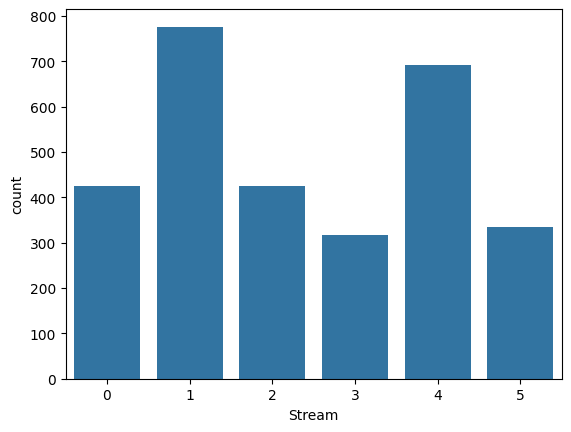

In [12]:
sns.countplot(x='Stream',data=df)
plt.show()

<Axes: xlabel='Stream', ylabel='Internships'>

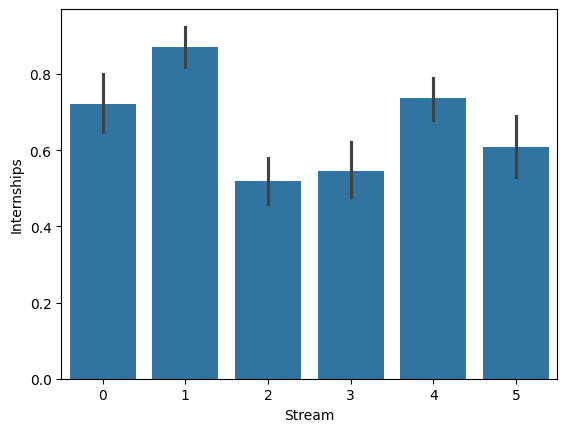

In [13]:
sns.barplot(x='Stream',y='Internships',data=df)

In [14]:
df1 = df.groupby('Stream').agg({'Age':'mean','Internships' : 'sum', "CGPA":'mean','PlacedOrNot':'sum'})
df1
#'Electronics And Communication': 0,'Computer Science': 1,'Mechanical': 2,
#'Civil': 3,'Information Technology': 4,'Electrical': 5

,Age,Internships,CGPA,PlacedOrNot
Stream,,,,
0,21.410377,306,7.125000,251
1,21.559278,676,7.039948,452
2,21.518868,220,7.063679,200
3,21.441640,173,7.094637,146
4,21.539797,509,7.073806,409
5,21.299401,203,7.080838,181


In [15]:
import plotly.express as px
px.bar(data_frame=df1, barmode='group',
       title = "<b>Stream wise Analyzing</b>")
#From Computer Science degree most of the student placed

In [16]:
fig = px.histogram(data_frame = df[df['Internships']==0],x = "PlacedOrNot",color="PlacedOrNot",title = "<b>No Internship Experience Vs Placement</b>")
fig.update_layout(bargap=0.2)
fig.show()

<Axes: >

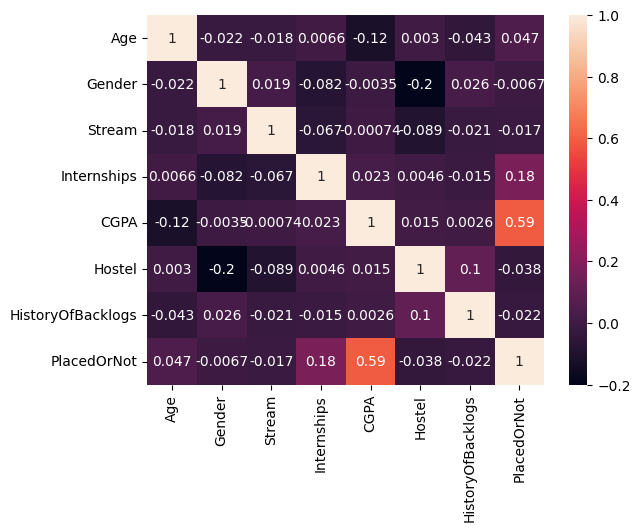

In [17]:
sns.heatmap(df.corr(),annot=True)

In [18]:
df['PlacedOrNot'].value_counts()

PlacedOrNot
1    1639
0    1327
Name: count, dtype: int64

In [19]:
#dividing the dataset into dependent and independent y and x respectively
x=df.drop('PlacedOrNot',axis=1)
y=df['PlacedOrNot']

## **TRAIN TEST SPLIT**

In [49]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [50]:
#for model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

## **MODEL BUILDING**

In [51]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [52]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [53]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

## **MODEL ACCURACY**

In [63]:
print("Logistic Regression :",lr.score(x_test,y_test) *100)
print("Decision Tree Classifier :",dt.score(x_test,y_test) *100)
print("Random Forest Classifier :",rfc.score(x_test,y_test) *100)

Logistic Regression : 76.76767676767676
Decision Tree Classifier : 86.86868686868688
Random Forest Classifier : 87.03703703703704


<ipython-input-69-41faa7a6c34f>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




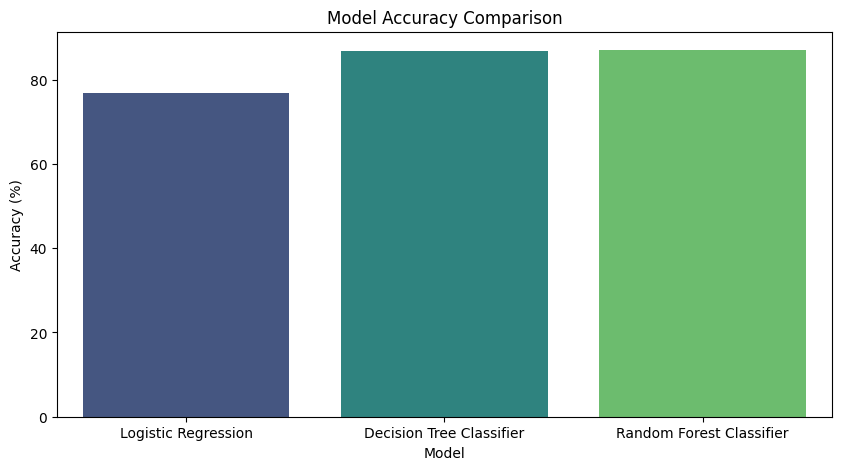

In [69]:
# prompt: generate a code to the accuracy score of 3 models using a barplot

models = ['Logistic Regression', 'Decision Tree Classifier', 'Random Forest Classifier']
scores = [lr.score(x_test, y_test) * 100, dt.score(x_test, y_test) * 100, rfc.score(x_test, y_test) * 100]

# Create a bar plot
plt.figure(figsize=(10, 5))
sns.barplot(x=models, y=scores , palette='viridis')

# Set plot labels and title
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy Comparison')

# Display the plot
plt.show()



In [70]:
rfc.predict(x_test.sample(n=10)) # Select 5 random rows from x_test

array([1, 1, 1, 1, 1, 0, 0, 1, 1, 0])

### **SAVING THE MODEL**

In [71]:
import pickle
pickle.dump(rfc,open('model.sav','wb'))  #saving the rfc model